The covariance matrix is 
 [[ 1.05189912  0.26721028]
 [ 0.26721028  0.08437999]] 
r is  0.89690488054
r is 14.8193007113 sigmas from zero.
Is r within the confidence interval?
No, 1.58491106806 < r = 14.8193007113
With 95% confidence, we can *reject* the null hypothesis that the samples are uncorrelated.
a =  -10.6933249296 
b = 0.254026529887


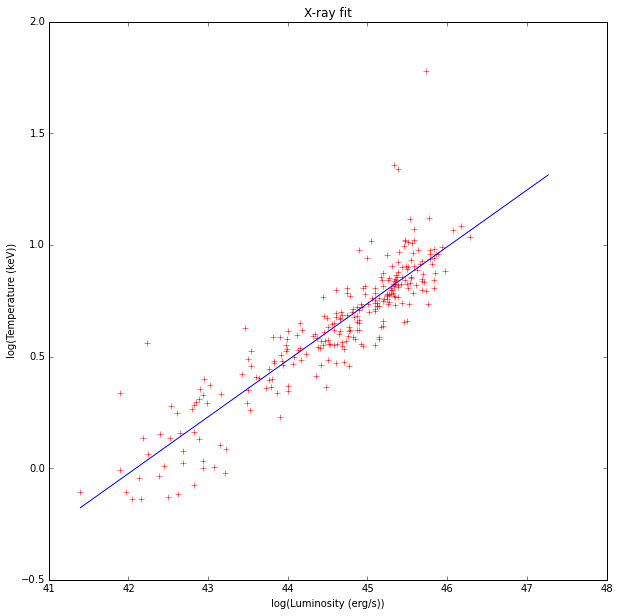

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456
"""

"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 3
Problem 3

On the course smartsite, you can find a file called “lx t.dat” under 
Resources → Homework → Data. The data file contains 3 columns, (1) X-ray 
luminosity in erg/s, (2) X-ray temperature in keV, (3) error on X-ray 
temperature. We’re going to ignore the errors for this problem, i.e., we 
will (incorrectly) give each data point equal weight. First, set 
x_i = log10(L_X) and y_i = log10(T_X).

"""
import numpy

data=numpy.loadtxt('lx_t.dat')
LX=data[:,0]
TX=data[:,1]
TXerr=data[:,2]

xi = numpy.log10(LX)
yi = numpy.log10(TX)


"""
(a) Calculate and write down the members of the x, y covariance matrix, and 
then calculate r. NOTE, write your own simple code to do the calculations 
to create the covariance matrix elements. Do not use any canned python 
routines.

"""

xmean = xi.sum()/xi.size
xvariance= numpy.sum((xi - xmean) ** 2)/(xi.size-1)

ymean = yi.sum()/yi.size
yvariance= numpy.sum((yi - ymean) ** 2)/(yi.size-1)

covariance = numpy.sum((xi - xmean)*(yi - ymean))/(xi.size-1)
cmatrix=numpy.array([[xvariance,covariance],[covariance,yvariance]])

r=covariance/(xvariance*yvariance)**(1/2)

print('The covariance matrix is \n',cmatrix,'\nr is ',r)
            
"""
(b) Are the two quantities correlated? For large  values of N , r is roughly
distributed as a Gaussian random variable with μ = 0 and σ = √(1/N). Even 
though N is not quite large enough, assume that Gaussianity has been 
achieved. Write down r in terms of number of σ from 0. Next, decide if we 
can reject the null hypothesis that the two samples are uncorrelated at 
better than 95% confidence.
"""
N=xi.size
sigma=(1/N)**(1/2)

rinunitsofsigma=r/sigma
print('r is',rinunitsofsigma,'sigmas from zero.')

import scipy.special
confidencelimit=scipy.special.erfinv(0.975)
# The value has to be at least this far from the mean to reject the null
# hypothesis with 95% confidence. I use 2.5% because the function is 
# two-tailed. 

print('Is r within the confidence interval?')
if numpy.abs(rinunitsofsigma)<confidencelimit:
    print('Yes,',-confidencelimit,'<',rinunitsofsigma,'<',confidencelimit)
    print('With 95% confidence, we *cannot* reject the null hypothesis that'
          'the samples are uncorrelated.')
else:
    if rinunitsofsigma>confidencelimit:
        print('No,',confidencelimit,'< r =',rinunitsofsigma)
        print('With 95% confidence, we can *reject* the null hypothesis',
              'that the samples are uncorrelated.')
    else:
        print('No, r =',rinunitsofsigma, '<',-confidencelimit)
        print('With 95% confidence, we can *reject* the null hypothesis',
              'that the samples are uncorrelated.')



"""
(c) Remember in class when I was deriving the correlation coefficient, I 
started by minimizing the mean square error for fitting a line to a data 
set. About half way through I found expressions for the fitting parameters 
a and b, where y_i = a + b*x_i, in terms of the variances and covariance. 
In particular, we found that

a = <y> − σ_xy/σ_x^2 <x>
b = σ_xy/σ_x^2

Apply this method to find the best-fitting line to the data. Write down 
your values for a and b. Plot the data and your best-fit line.
"""

# This assumes the error on y is negligible
b = covariance/xvariance
a = ymean - b * xmean

print('a = ',a,'\nb =',b)

from matplotlib import pyplot
%matplotlib inline

xfit=numpy.arange(xi.min(),xi.max()+1,(xi.max()-xi.min())/10)
yfit=a+b*xfit

figure1 = pyplot.figure(figsize=(10,10));
pyplot.plot(xi,yi,'r+');
pyplot.plot(xfit,yfit,'b');
pyplot.title('X-ray fit')
pyplot.xlabel('log(Luminosity (erg/s))')
pyplot.ylabel('log(Temperature (keV))')

